In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/Happy_resly.csv")

In [3]:
data.head(10)

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Government Corruption,Generosity,Year
0,Switzerland,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,7.406,1.29025,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,7.378,1.32944,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,7.364,1.33171,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,7.286,1.25018,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,7.284,1.33358,0.93156,0.65124,0.35637,0.43562,2015


In [4]:
data.tail(10)

,Country,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Government Corruption,Generosity,Year
772,Haiti,3.597,0.323,0.449,0.026,0.110,0.419,2019
773,Botswana,3.488,1.041,0.538,0.455,0.100,0.025,2019
774,Syria,3.462,0.619,0.440,0.013,0.141,0.331,2019
775,Malawi,3.410,0.191,0.495,0.443,0.089,0.218,2019
776,Yemen,3.380,0.287,0.463,0.143,0.077,0.108,2019
777,Rwanda,3.334,0.359,0.614,0.555,0.411,0.217,2019
778,Tanzania,3.231,0.476,0.499,0.417,0.147,0.276,2019
779,Afghanistan,3.203,0.350,0.361,0.000,0.025,0.158,2019
780,Central African Republic,3.083,0.026,0.105,0.225,0.035,0.235,2019
781,South Sudan,2.853,0.306,0.295,0.010,0.091,0.202,2019


In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   782 non-null    object 
 1   Happiness Score           782 non-null    float64
 2   Economy (GDP per Capita)  782 non-null    float64
 3   Health (Life Expectancy)  782 non-null    float64
 4   Freedom                   782 non-null    float64
 5   Government Corruption     781 non-null    float64
 6   Generosity                782 non-null    float64
 7   Year                      782 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 49.0+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,782.0,5.379018,1.127456,2.693,4.509750,5.322000,6.189500,7.769000
Economy (GDP per Capita),782.0,0.916047,0.407340,0.000,0.606500,0.982205,1.236187,2.096000
Health (Life Expectancy),782.0,0.612416,0.248309,0.000,0.440183,0.647310,0.808000,1.141000
Freedom,782.0,0.411091,0.152880,0.000,0.309768,0.431000,0.531000,0.724000
Government Corruption,781.0,0.125436,0.105816,0.000,0.054000,0.091000,0.156030,0.551910
Generosity,782.0,0.218576,0.122321,0.000,0.130000,0.201982,0.278832,0.838075
Year,782.0,2016.993606,1.417364,2015.000,2016.000000,2017.000000,2018.000000,2019.000000


In [7]:
data.isnull().sum()

,0
Country,0
Happiness Score,0
Economy (GDP per Capita),0
Health (Life Expectancy),0
Freedom,0
Government Corruption,1
Generosity,0
Year,0


In [8]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

data['Government Corruption'] = imputer.fit_transform(data[['Government Corruption']])



In [9]:
data.isnull().sum()

,0
Country,0
Happiness Score,0
Economy (GDP per Capita),0
Health (Life Expectancy),0
Freedom,0
Government Corruption,0
Generosity,0
Year,0


In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
top_5_happy_countries = data.sort_values(by='Happiness Score', ascending=False).head(5)

top_5_happy_countries = top_5_happy_countries[['Country', 'Happiness Score']]

print("Bottom 5 Least Happy Countries:")
print("\n")
print(top_5_happy_countries)


Bottom 5 Least Happy Countries:


         Country  Happiness Score
626      Finland            7.769
470      Finland            7.632
627      Denmark            7.600
471       Norway            7.594
0    Switzerland            7.587


In [12]:
bottom_5_least_happy = data.sort_values(by='Happiness Score', ascending=True).head(5)

bottom_5_least_happy_countries = bottom_5_least_happy[['Country', 'Happiness Score']]

print("Bottom 5 Least Happy Countries:")
print("\n")
print(bottom_5_least_happy_countries)


Bottom 5 Least Happy Countries:


                      Country  Happiness Score
469  Central African Republic            2.693
157                      Togo            2.839
781               South Sudan            2.853
468                   Burundi            2.905
156                   Burundi            2.905


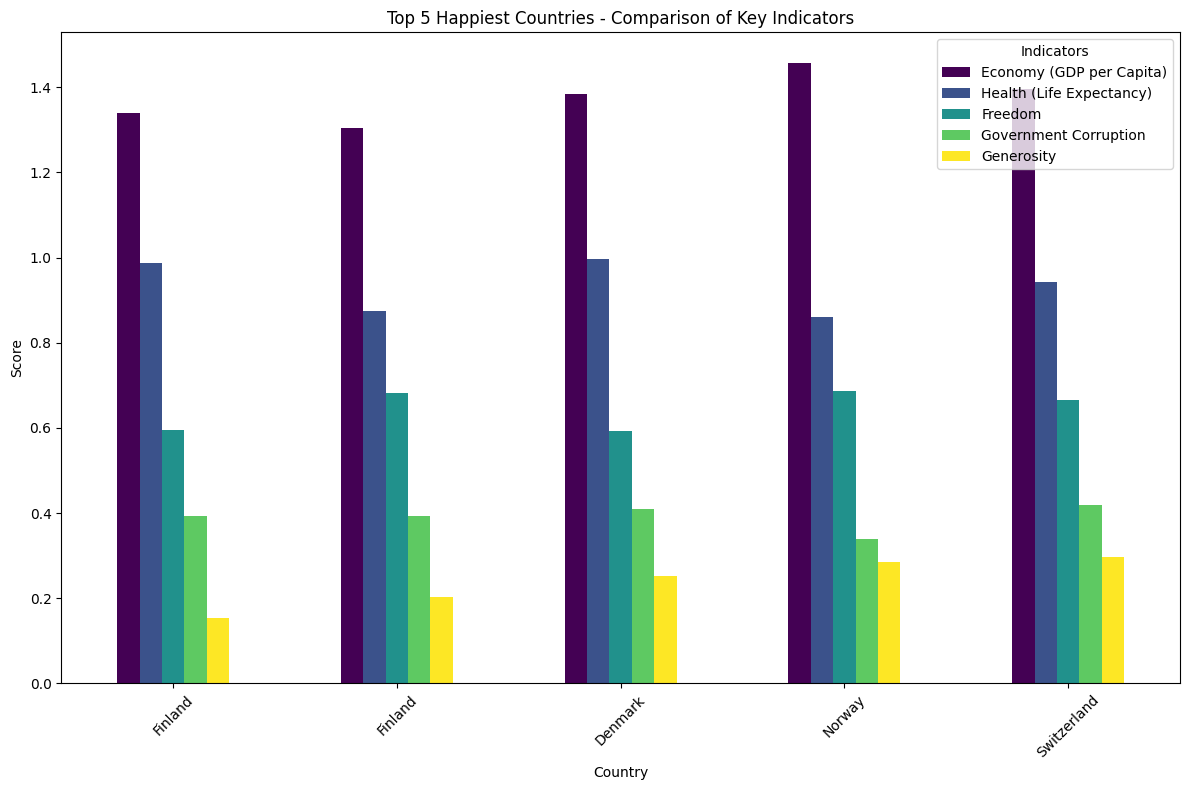

In [13]:
indicators = ['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Government Corruption', 'Generosity']

top_5_happiest = data.sort_values(by='Happiness Score', ascending=False).head(5)

top_5_happiest_indicators = top_5_happiest[['Country', 'Happiness Score'] + indicators]

top_5_happiest_indicators.set_index('Country').drop(columns='Happiness Score').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Top 5 Happiest Countries - Comparison of Key Indicators')
plt.ylabel('Score')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Indicators')
plt.tight_layout()
plt.show()

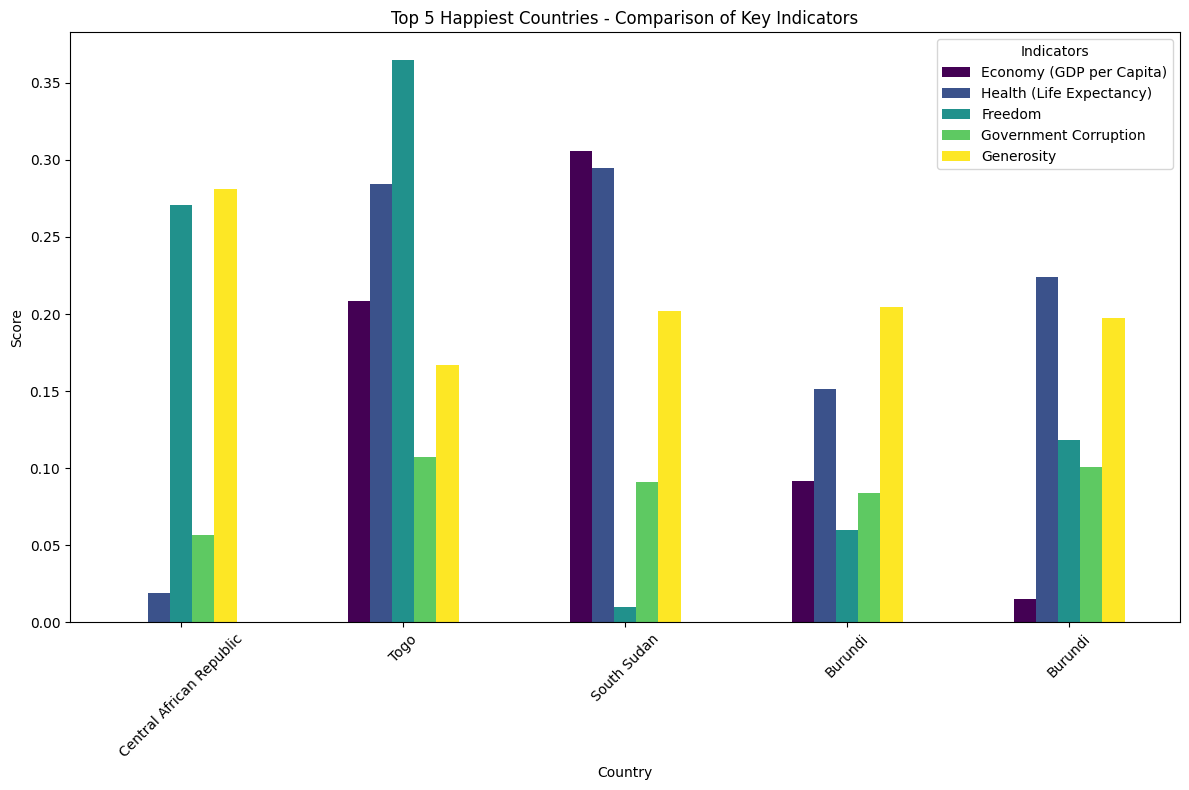

In [14]:
indicators = ['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Government Corruption', 'Generosity']

top_5_happiest = data.sort_values(by='Happiness Score', ascending=True).head(5)

top_5_happiest_indicators = top_5_happiest[['Country', 'Happiness Score'] + indicators]


top_5_happiest_indicators.set_index('Country').drop(columns='Happiness Score').plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Top 5 Happiest Countries - Comparison of Key Indicators')
plt.ylabel('Score')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.legend(title='Indicators')
plt.tight_layout()
plt.show()

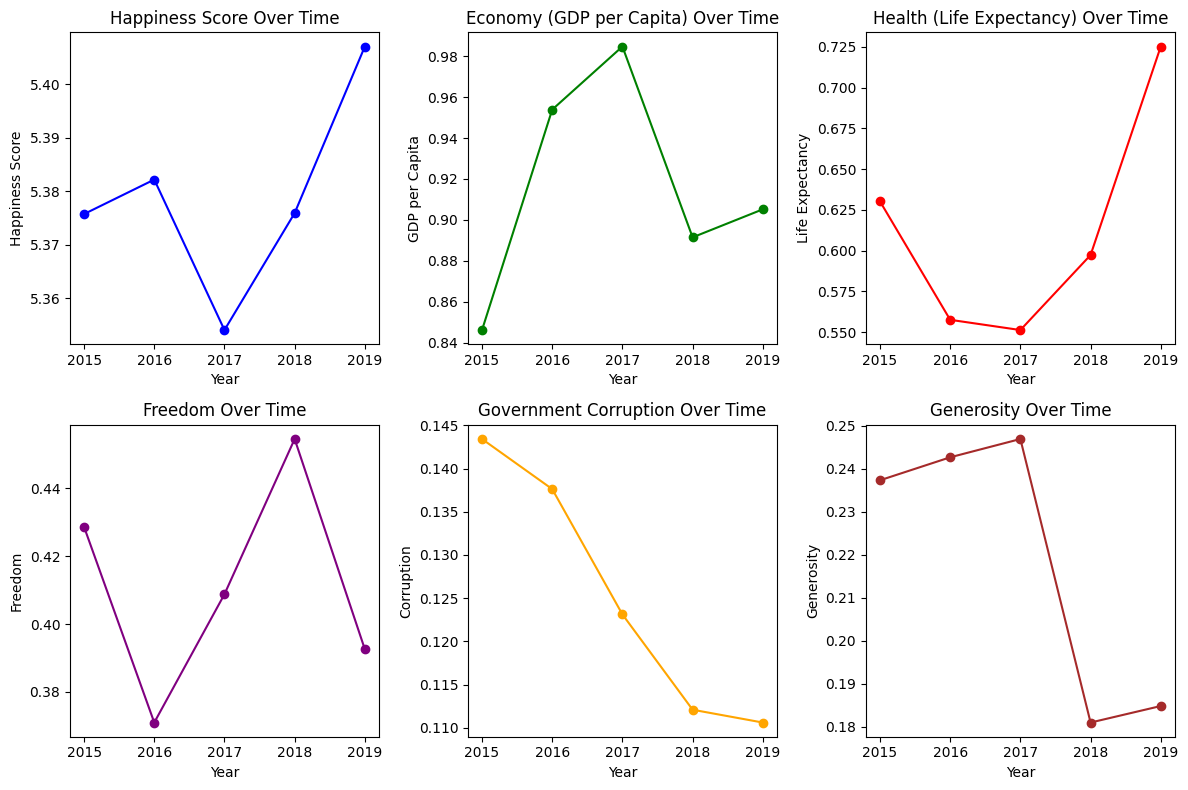

In [15]:
yearly_data = data.groupby('Year')[['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)',
                                          'Freedom', 'Government Corruption', 'Generosity']].mean()

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
yearly_data['Happiness Score'].plot(kind='line', marker='o', color='blue')
plt.title('Happiness Score Over Time')
plt.ylabel('Happiness Score')


plt.subplot(2, 3, 2)
yearly_data['Economy (GDP per Capita)'].plot(kind='line', marker='o', color='green')
plt.title('Economy (GDP per Capita) Over Time')
plt.ylabel('GDP per Capita')


plt.subplot(2, 3, 3)
yearly_data['Health (Life Expectancy)'].plot(kind='line', marker='o', color='red')
plt.title('Health (Life Expectancy) Over Time')
plt.ylabel('Life Expectancy')


plt.subplot(2, 3, 4)
yearly_data['Freedom'].plot(kind='line', marker='o', color='purple')
plt.title('Freedom Over Time')
plt.ylabel('Freedom')


plt.subplot(2, 3, 5)
yearly_data['Government Corruption'].plot(kind='line', marker='o', color='orange')
plt.title('Government Corruption Over Time')
plt.ylabel('Corruption')


plt.subplot(2, 3, 6)
yearly_data['Generosity'].plot(kind='line', marker='o', color='brown')
plt.title('Generosity Over Time')
plt.ylabel('Generosity')


plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import folium
import numpy as np

coordinates_data = {
    'Country': [

        'Switzerland', 'Iceland', 'Denmark', 'Norway', 'Finland',
        'Netherlands', 'Sweden', 'Germany', 'United Kingdom', 'France',
        'Italy', 'Belgium', 'Austria', 'Spain', 'Portugal', 'Azerbaijan',


        'Canada', 'United States', 'Mexico', 'Brazil', 'Argentina', 'Chile',

        'Japan', 'South Korea', 'Australia', 'New Zealand', 'China', 'India',
        'Singapore', 'Thailand', 'Vietnam', 'Indonesia',

        'Saudi Arabia', 'United Arab Emirates', 'South Africa', 'Egypt',
        'Morocco', 'Nigeria', 'Kenya', 'Turkey'
    ],
    'Latitude': [
        46.8182, 64.9631, 56.2639, 60.4720, 61.9241,
        52.3784, 60.1282, 51.1657, 51.5074, 48.8566,
        41.9028, 50.8503, 47.3686, 40.4637, 39.3999, 40.1431,


        56.1304, 37.0902, 19.4326, -14.2350, -34.6037, -35.6751,

        35.6762, 37.5665, -25.2744, -40.9006, 35.8617, 20.5937,
        1.3521, 15.8700, 14.0583, -0.7893,

        23.8859, 23.4241, -30.5595, 26.8206,
        31.7917, 9.0820, -1.2921, 38.9637
    ],
    'Longitude': [
        8.2275, -19.0208, 9.5018, 8.4689, 25.7482,
        4.9009, 18.6435, 10.4515, -0.1278, 2.3522,
        12.4964, 4.3517, 16.3705, -3.7038, -8.2242, 47.5769,

        -106.3468, -95.7129, -99.1332, -51.9253, -58.3816, -71.5430,

        139.6503, 126.9780, 133.7751, 174.8860, 104.1954, 78.9629,
        103.8198, 100.9925, 108.2772, 113.9213,

        45.0792, 53.8478, 22.9375, 30.8025,
        -7.0926, 8.6753, 36.8219, 35.2433
    ]
}
coords_df = pd.DataFrame(coordinates_data)


merged_df = pd.merge(data, coords_df, on='Country', how='left')

merged_df_cleaned = merged_df.dropna(subset=['Latitude', 'Longitude'])

world_map = folium.Map(location=[20, 0], zoom_start=2)


for index, row in merged_df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=8,
        color='blue' if row['Happiness Score'] > 5 else 'red',
        fill=True,
        fill_color='blue' if row['Happiness Score'] > 5 else 'red',
        fill_opacity=0.7,
        popup=f"{row['Country']}: {row['Happiness Score']}"
    ).add_to(world_map)

world_map.save("happiness_map.html")
